In [7]:
import matplotlib.pyplot as plt
import pandas as pd


total_record = pd.read_csv('scripts/7_learnATrue_CDzeroFalse_psdlatentFalse.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 40000]
length = total_record.shape[0]

num_groups = length // 3
remainings = length - num_groups * 3

mask_ratio = [0.01, 0.05, 0.10]
mask_ratio_col = mask_ratio * num_groups + mask_ratio[:remainings]
total_record['mask_ratio'] = mask_ratio_col


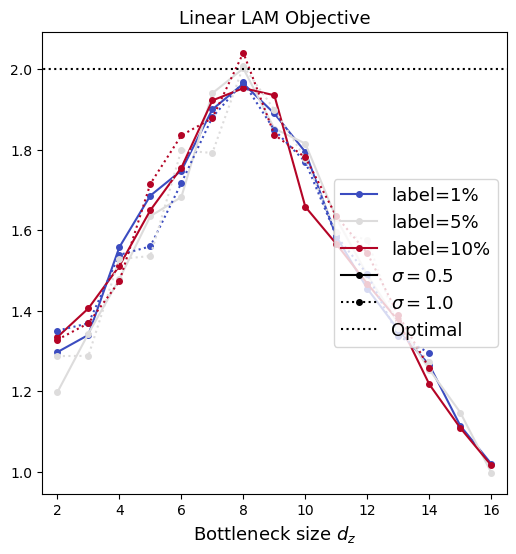

In [11]:
total_record['LLO'] = - total_record['act_mse'] + total_record['obs_mse'] + total_record['noi_mse']

# total_record = total_record.loc[total_record['dz'] >= 7]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('mask_ratio')) - 1) 

ls_list = ['solid', 'dotted', 'dashed']

for ls_id, sigma in enumerate(total_record['sigma'].drop_duplicates().tolist()):
    sigma_record = total_record.loc[total_record['sigma'] == sigma]
    counter = 0
    for mask_ratio, group in sigma_record.groupby('mask_ratio'):
        sorted_group = group.sort_values('dz')
        if ls_id == 0:
             plt.plot(sorted_group['dz'], sorted_group['LLO'], label=f'label={int(mask_ratio*100)}%', ls=ls_list[ls_id], marker='o', markersize=4, color=cmap(norm(counter)))
        else:
             plt.plot(sorted_group['dz'], sorted_group['LLO'], ls=ls_list[ls_id], marker='o', markersize=4, color=cmap(norm(counter)))
        counter += 1

for ls_id, sigma in enumerate(total_record['sigma'].drop_duplicates().tolist()):
     plt.plot([-100, -90], [1, 1], ls=ls_list[ls_id], color='k', marker='o', markersize=4, label=rf'$\sigma=${sigma}')

plt.plot([0, 17], [2, 2], 'k:', label='Optimal')

plt.xlim([1.5, 16.5])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Bottleneck size $d_z$', fontsize=13)
plt.legend(fontsize=13, loc='right')

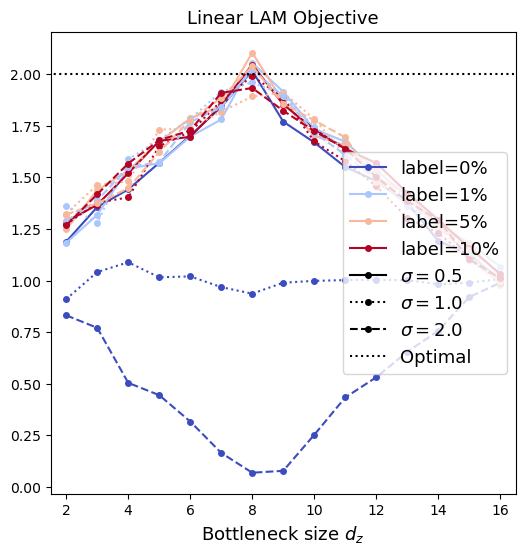

In [3]:
import matplotlib.pyplot as plt
import pandas as pd


total_record = pd.read_csv('scripts/7_learnATrue_CDzeroFalse_psdlatentFalse_v2.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 40000]
total_record['LLO'] = - total_record['act_mse'] + total_record['obs_mse'] + total_record['noi_mse']

# total_record = total_record.loc[total_record['dz'] >= 7]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('mask_ratio')) - 1) 

ls_list = ['solid', 'dotted', 'dashed']

for ls_id, sigma in enumerate(total_record['sigma'].drop_duplicates().tolist()):
    sigma_record = total_record.loc[total_record['sigma'] == sigma]
    counter = 0
    for mask_ratio, group in sigma_record.groupby('mask_ratio'):
        sorted_group = group.sort_values('dz')
        if ls_id == 0:
             plt.plot(sorted_group['dz'], sorted_group['LLO'], label=f'label={int(mask_ratio*100)}%', ls=ls_list[ls_id], marker='o', markersize=4, color=cmap(norm(counter)))
        else:
             plt.plot(sorted_group['dz'], sorted_group['LLO'], ls=ls_list[ls_id], marker='o', markersize=4, color=cmap(norm(counter)))
        counter += 1

for ls_id, sigma in enumerate(total_record['sigma'].drop_duplicates().tolist()):
     plt.plot([-100, -90], [1, 1], ls=ls_list[ls_id], color='k', marker='o', markersize=4, label=rf'$\sigma=${sigma}')

plt.plot([0, 17], [2, 2], 'k:', label='Optimal')

plt.xlim([1.5, 16.5])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Bottleneck size $d_z$', fontsize=13)
plt.legend(fontsize=13, loc='right')

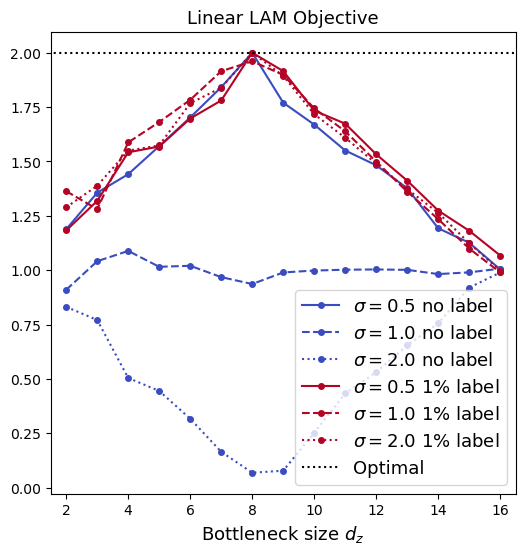

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


total_record = pd.read_csv('scripts/7_learnATrue_CDzeroFalse_psdlatentFalse_v2.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 40000]
total_record['LLO'] = (- total_record['act_mse'] + total_record['obs_mse'] + total_record['noi_mse']).clip(upper=2.0)


plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=1) 

record = total_record.loc[(total_record['sigma'] == 0.5) & (total_record['mask_ratio'] == 0)]
sorted_group = record.sort_values('dz')
plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma=0.5$ no label', ls='solid', marker='o', markersize=4, color=cmap(norm(0)))

record = total_record.loc[(total_record['sigma'] == 1.0) & (total_record['mask_ratio'] == 0)]
sorted_group = record.sort_values('dz')
plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma=1.0$ no label', ls='dashed', marker='o', markersize=4, color=cmap(norm(0)))

record = total_record.loc[(total_record['sigma'] == 2.0) & (total_record['mask_ratio'] == 0)]
sorted_group = record.sort_values('dz')
plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma=2.0$ no label', ls='dotted', marker='o', markersize=4, color=cmap(norm(0)))

record = total_record.loc[(total_record['sigma'] == 0.5) & (total_record['mask_ratio'] == 0.01)]
sorted_group = record.sort_values('dz')
plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma=0.5$ 1% label', ls='solid', marker='o', markersize=4, color=cmap(norm(1)))

record = total_record.loc[(total_record['sigma'] == 1.0) & (total_record['mask_ratio'] == 0.01)]
sorted_group = record.sort_values('dz')
plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma=1.0$ 1% label', ls='dashed', marker='o', markersize=4, color=cmap(norm(1)))

record = total_record.loc[(total_record['sigma'] == 2.0) & (total_record['mask_ratio'] == 0.01)]
sorted_group = record.sort_values('dz')
plt.plot(sorted_group['dz'], sorted_group['LLO'], label=r'$\sigma=2.0$ 1% label', ls='dotted', marker='o', markersize=4, color=cmap(norm(1)))


plt.plot([0, 17], [2, 2], 'k:', label='Optimal')

plt.xlim([1.5, 16.5])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Bottleneck size $d_z$', fontsize=13)
plt.legend(fontsize=13)